In [18]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [19]:
import pandas as pd
df1 = pd.read_csv("covid19-twitter-dataset/Covid-19 Twitter Dataset (Apr-Jun 2020).csv")
df2 = pd.read_csv("covid19-twitter-dataset/Covid-19 Twitter Dataset (Aug-Sep 2020).csv")

df = pd.concat([df1, df2], ignore_index=True)
df.head()

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1.250000e+18,Sun Apr 19 21:21:54 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @GlblCtzn: .@priyankachopra is calling on l...,en,0.0,31.0,RJIshak,NaN,"GlblCtzn, priyankachopra",Jakarta Capital Region,call leader help protect refuge covid19 provid...,0.8176,0.0,0.452,0.548,pos
1,1.250000e+18,Sun Apr 19 21:21:53 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...,en,0.0,61.0,makinwaoluwole,NaN,OGSG_Official,Nigeria,ogun state support cbn nirsal covid19 target c...,0.6486,0.0,0.602,0.398,pos
2,1.250000e+18,Sun Apr 19 21:21:52 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @AdvoBarryRoux: These 5 police officials ba...,en,0.0,1.0,TembeAmu,NaN,AdvoBarryRoux,NaN,polic offici base namahadi polic station busi ...,0.2732,0.0,0.851,0.149,pos
3,1.250000e+18,Sun Apr 19 21:21:51 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @MobilePunch: COVID-19: Oyo discharges two ...,en,0.0,0.0,ilyasrabiu,NaN,MobilePunch,"Lagos, Nigeria",covid19 oyo discharg two patient,0.0000,0.0,1.000,0.000,neu
4,1.250000e+18,Sun Apr 19 21:21:50 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",My Condolences to the Family of those who did ...,en,0.0,13869.0,bucketeconomist,Covid_19,NaN,NaN,condol famili surviv,0.0000,0.0,1.000,0.000,neu


In [20]:
df = df.reset_index()

In [21]:
df=df.iloc[:,[0,2,4,7,8,17]]

In [22]:
df.drop('index', inplace=True, axis=1)
df.drop("original_author", inplace = True, axis = 1)
df.drop("created_at", inplace = True, axis = 1)
df.drop("sentiment", inplace = True, axis = 1)
df.head()

,original_text,retweet_count
0,RT @GlblCtzn: .@priyankachopra is calling on l...,31.0
1,RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...,61.0
2,RT @AdvoBarryRoux: These 5 police officials ba...,1.0
3,RT @MobilePunch: COVID-19: Oyo discharges two ...,0.0
4,My Condolences to the Family of those who did ...,13869.0


In [23]:
from sklearn.model_selection import train_test_split
df_train, throw_data = train_test_split(df, test_size=0.5)
df_train, df_test = train_test_split(df_train, test_size=0.2)

In [24]:
df_train = df_train.reset_index()
df_train.drop('index', inplace=True, axis=1)
df_train.head()

,original_text,retweet_count
0,RT @Mosace1: Why does this #MadagascarCure fo...,10.0
1,Stranded at sea for months due to Covid-19 and...,5586.0
2,INEC conducted an election under strict covid ...,58.0
3,RT @Reuters: Japanese fashion designer Kenzo T...,2187.0
4,"RT @JuliaDavisNews: In Hong Kong, only four co...",5.0


In [34]:
def remove_links_mentions(tweet):
    link_re_pattern = "https?:\/\/t.co/[\w]+"
    mention_re_pattern = "@\w+"
    tweet = re.sub(link_re_pattern, "", tweet)
    tweet = re.sub(mention_re_pattern, "", tweet)
    return tweet.lower()

In [38]:
df_train["original_text"][27]

'calling vauxhall businesses📢vauxhall mp  and the  need the views of culture and creative in… '

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222222 entries, 0 to 222221
Data columns (total 2 columns):
original_text    222219 non-null object
retweet_count    222219 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.4+ MB


In [39]:
df_train["retweet_count"][27]

478.0

In [26]:
train_set = list(df_train.to_records(index=False))
test_set = list(df_test.to_records(index=False))

In [40]:
train_set[27]

('Calling Vauxhall businesses📢Vauxhall MP @FloEshalomi and the @CommonsDCMS need the views of culture and creative in… https://t.co/NJxte9eHwI', 478.)

In [43]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [45]:
from nltk.tokenize import word_tokenize
train_set = [(word_tokenize(remove_links_mentions(str(tweet))), label) for tweet, label in train_set]
train_set[27]

(['calling',
  'vauxhall',
  'businesses📢vauxhall',
  'mp',
  'and',
  'the',
  'need',
  'the',
  'views',
  'of',
  'culture',
  'and',
  'creative',
  'in…'],
 478.0)

In [47]:
from nltk.tokenize import word_tokenize
test_set = [(word_tokenize(remove_links_mentions(str(tweet))), label) for tweet, label in test_set]
test_set[27]
    

(['[',
  "'rt",
  "'",
  ',',
  "'",
  ':',
  "'",
  ',',
  "'the",
  "'",
  ',',
  "'fake",
  "'",
  ',',
  "'news",
  "'",
  ',',
  "'media",
  "'",
  ',',
  "'refuses",
  "'",
  ',',
  "'to",
  "'",
  ',',
  "'discuss",
  "'",
  ',',
  "'how",
  "'",
  ',',
  "'good",
  "'",
  ',',
  "'the",
  "'",
  ',',
  "'economy",
  "'",
  ',',
  "'and",
  "'",
  ',',
  "'stock",
  "'",
  ',',
  "'market",
  "'",
  ',',
  "'",
  ',',
  "'",
  ',',
  "'including",
  "'",
  ',',
  "'jobs",
  "'",
  ',',
  "'under",
  "'",
  ',',
  "'the",
  "'",
  ',',
  "'trump",
  "'",
  ',',
  "'administr…",
  "'",
  ']'],
 0.0)

In [50]:
index2word = ["<PAD>", "<SOS>", "<EOS>"]

for ds in [train_set, test_set]:
    for tweet, label in ds:
        for token in tweet:
            if token not in index2word:
                index2word.append(token)

In [51]:
index2word[10]

'for'

In [52]:
word2index = {token: idx for idx, token in enumerate(index2word)}

In [53]:
word2index["for"]

10

In [54]:
def encode_and_pad(tweet, length):
    sos = [word2index["<SOS>"]]
    eos = [word2index["<EOS>"]]
    pad = [word2index["<PAD>"]]

    if len(tweet) < length - 2: # -2 for SOS and EOS
        n_pads = length - 2 - len(tweet)
        encoded = [word2index[w] for w in tweet]
        return sos + encoded + eos + pad * n_pads 
    else: # tweet is longer than possible; truncating
        encoded = [word2index[w] for w in tweet]
        truncated = encoded[:length - 2]
        return sos + truncated + eos

In [56]:
seq_length = 32
train_encoded = [(encode_and_pad(tweet, seq_length), label) for tweet, label in train_set]

In [57]:
test_encoded = [(encode_and_pad(tweet, seq_length), label) for tweet, label in test_set]

In [58]:
train_encoded[27]

([1,
  362,
  363,
  364,
  365,
  32,
  78,
  366,
  78,
  367,
  80,
  368,
  32,
  369,
  370,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 478.0)

In [61]:
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
batch_size = 50

train_x = np.array([tweet for tweet, label in train_encoded])
train_y = np.array([label for tweet, label in train_encoded])
test_x = np.array([tweet for tweet, label in test_encoded])
test_y = np.array([label for tweet, label in test_encoded])

train_ds = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
test_ds = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))


train_dl = DataLoader(train_ds, shuffle=True, batch_size=batch_size, drop_last=True)
test_dl = DataLoader(test_ds, shuffle=True, batch_size=batch_size, drop_last=True)

In [88]:
import torch.nn as nn
import torch.nn.functional as F
class LSTM(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim, dropout) :
        super().__init__()

        # The embedding layer takes the vocab size and the embeddings size as input
        # The embeddings size is up to you to decide, but common sizes are between 50 and 100.
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # The LSTM layer takes in the the embedding size and the hidden vector size.
        # The hidden dimension is up to you to decide, but common values are 32, 64, 128
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)

        # We use dropout before the final layer to improve with regularization
        self.dropout = nn.Dropout(dropout)

        # The fully-connected layer takes in the hidden dim of the LSTM and
        #  outputs a a 3x1 vector of the class scores.
        self.fc = nn.Linear(hidden_dim, 1)
        
        self.relu = nn.ReLU()

    def forward(self, x, hidden):
        """
        The forward method takes in the input and the previous hidden state 
        """

        # The input is transformed to embeddings by passing it to the embedding layer
        embs = self.embedding(x)

        # The embedded inputs are fed to the LSTM alongside the previous hidden state
        out, hidden = self.lstm(embs, hidden)

        # Dropout is applied to the output and fed to the FC layer
        out = self.dropout(out)
        out = self.fc(out)

        # We extract the scores for the final hidden state since it is the one that matters.
        out = out[:, -1]
        out = self.relu(out)
        return out.squeeze(), hidden
    
    def init_hidden(self):
        return (torch.zeros(1, batch_size, 32), torch.zeros(1, batch_size, 32))

In [89]:

model = LSTM(len(word2index), 64, 32, 0.2)
model = model.to(device)

In [71]:
criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)

In [83]:
# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

In [98]:
epochs = 30
losses = []

for e in range(epochs):

    h0, c0 =  model.init_hidden()

    h0 = h0.to(device)
    c0 = c0.to(device)
    accuracy_score = 0.0
    

    for batch_idx, batch in enumerate(train_dl):
        

        input = batch[0].to(device)
        target = batch[1].to(device)

        optimizer.zero_grad()
        with torch.set_grad_enabled(True):
            out, hidden = model(input, (h0, c0))
            loss = criterion(out, target)
            accu= acc(out, target)
            accuracy_score += accu
            
            loss.backward()
            optimizer.step()
     
    losses.append(loss.item())
    print("Epoch ", e, ", Accuracy : ", accuracy_score * 100 / len(train_dl.dataset))
    
    
    
    

Epoch  0 , Accuracy :  20.94077094077094
Epoch  1 , Accuracy :  20.94032094032094
Epoch  2 , Accuracy :  20.94032094032094
Epoch  3 , Accuracy :  20.941670941670942
Epoch  4 , Accuracy :  20.94032094032094
Epoch  5 , Accuracy :  20.93942093942094
Epoch  6 , Accuracy :  20.93987093987094
Epoch  7 , Accuracy :  20.93987093987094
Epoch  8 , Accuracy :  20.93897093897094
Epoch  9 , Accuracy :  20.93987093987094
Epoch  10 , Accuracy :  20.93987093987094
Epoch  11 , Accuracy :  20.94032094032094
Epoch  12 , Accuracy :  20.94077094077094
Epoch  13 , Accuracy :  20.93942093942094
Epoch  14 , Accuracy :  20.94122094122094
Epoch  15 , Accuracy :  20.94077094077094
Epoch  16 , Accuracy :  20.93942093942094
Epoch  17 , Accuracy :  20.93897093897094
Epoch  18 , Accuracy :  20.94032094032094
Epoch  19 , Accuracy :  20.938520938520938
Epoch  20 , Accuracy :  20.938520938520938
Epoch  21 , Accuracy :  20.93987093987094
Epoch  22 , Accuracy :  20.93942093942094
Epoch  23 , Accuracy :  20.93942093942094

Text(0, 0.5, 'Loss')

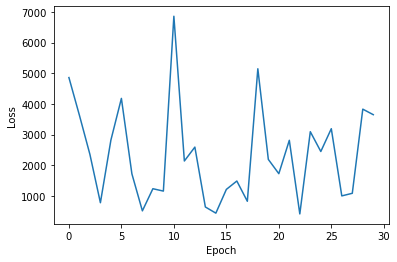

In [103]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [102]:

#evaluation
batch_acc = []
valid_accuracy = 0.0
for batch_idx, batch in enumerate(test_dl):

    input = batch[0].to(device)
    target = batch[1].to(device)

    optimizer.zero_grad()
    with torch.set_grad_enabled(False):
        out, hidden = model(input, (h0, c0))
        accu= acc(out, target)
        valid_accuracy += accu


print("Test Accuracy : ", valid_accuracy * 100 / len(test_dl.dataset))

Test Accuracy :  21.27042983656131
